# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,roc_curve
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Train-test split

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [5]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

# Define Functions

In [6]:
def scores(clf):
    print("Training set score: {:.3f}".format(clf.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(clf.score(X_test, y_test)))

In [7]:
def test_report(clf):
    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    print("Accuracy=", metrics.accuracy_score(y_test, y_pred))

In [8]:
def roc(clf):
    y_pred_proba = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.plot([0,1],[0,1],'k--')
    plt.legend(loc=4)
    plt.show()

In [9]:
def gains_chart(clf):
    y_pred_probas = clf.predict_proba(X_test)
    skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
    plt.show()

In [10]:
def lift_chart(clf):
    y_pred_probas = clf.predict_proba(X_test)
    skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
    plt.show()

In [11]:
def call(clf):
    clf.fit(X_train, y_train)
    scores(clf)
    print('*'*100)
    test_report(clf)
    print('*'*100)
    roc(clf)
    print('*'*100)
    gains_chart(clf)
    print('*'*100)
    lift_chart(clf)

# Logistic Regression

Training set score: 0.771
Test set score: 0.727
****************************************************************************************************
[[150  17]
 [ 53  36]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       167
           1       0.68      0.40      0.51        89

    accuracy                           0.73       256
   macro avg       0.71      0.65      0.66       256
weighted avg       0.72      0.73      0.71       256

Accuracy= 0.7265625
****************************************************************************************************


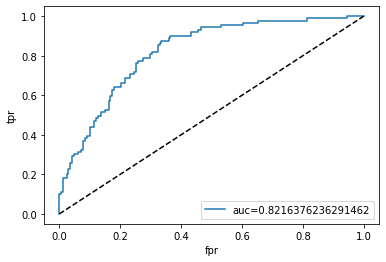

****************************************************************************************************


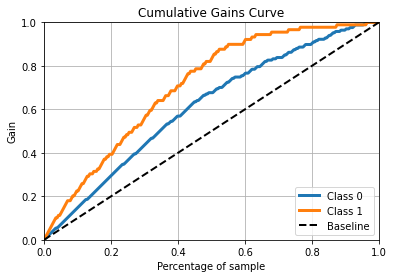

****************************************************************************************************


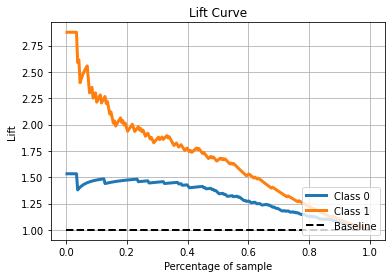

In [12]:
clf1 = LogisticRegression(C=0.01)
call(clf1)

In [13]:
# clf1.intercept_.T
# clf1.coef_.T

# K-NN

In [14]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

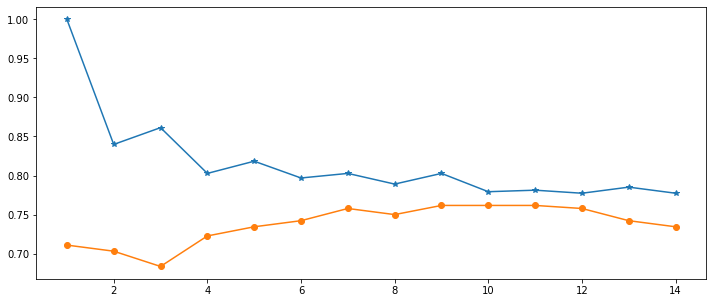

In [15]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')

#### The best result is captured at k = 11 hence 11 is used for the final model

Training set score: 0.781
Test set score: 0.762
****************************************************************************************************
[[145  22]
 [ 39  50]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.69      0.56      0.62        89

    accuracy                           0.76       256
   macro avg       0.74      0.72      0.72       256
weighted avg       0.76      0.76      0.75       256

Accuracy= 0.76171875
****************************************************************************************************


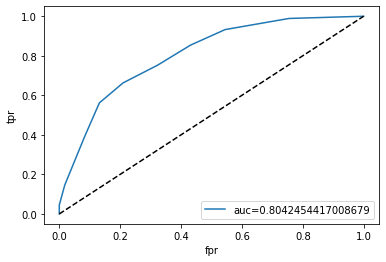

****************************************************************************************************


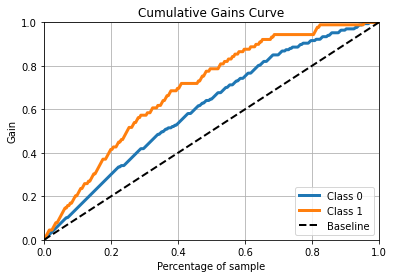

****************************************************************************************************


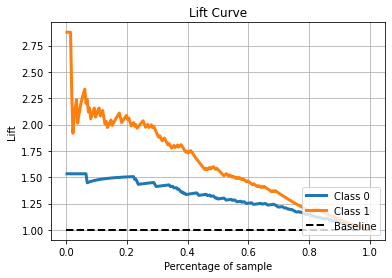

In [16]:
clf2 = KNeighborsClassifier(11)
call(clf2)

# Naiive Bayes

Training set score: 0.779
Test set score: 0.738
****************************************************************************************************
[[132  35]
 [ 32  57]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       167
           1       0.62      0.64      0.63        89

    accuracy                           0.74       256
   macro avg       0.71      0.72      0.71       256
weighted avg       0.74      0.74      0.74       256

Accuracy= 0.73828125
****************************************************************************************************


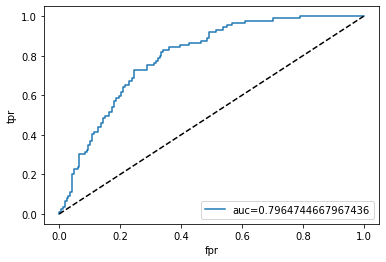

****************************************************************************************************


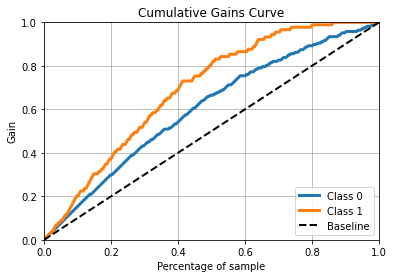

****************************************************************************************************


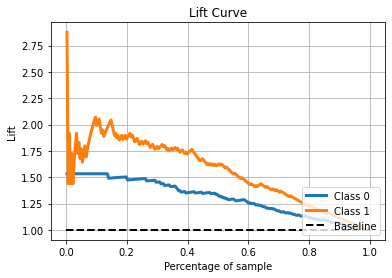

In [17]:
clf3 = GaussianNB()
call(clf3)

# Compare Performance

In [18]:
# You can compare the performance of multiple models in one ROC chart. Wrtie your own codes in the cells below.

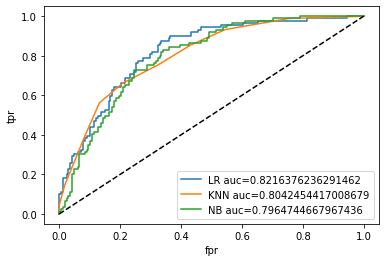

In [21]:
y_pred_proba1 = clf1.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)

y_pred_proba2 = clf2.predict_proba(X_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)

y_pred_proba3 = clf3.predict_proba(X_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test,  y_pred_proba3)
auc3 = metrics.roc_auc_score(y_test, y_pred_proba3)

plt.plot(fpr1,tpr1,label="LR auc="+str(auc1))
plt.plot(fpr2,tpr2,label="KNN auc="+str(auc2))
plt.plot(fpr3,tpr3,label="NB auc="+str(auc3))

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

In [ ]:
# Logistic Regression (LR) performs the best. Highest area under curve.